In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import norm
import scipy.integrate as integrate

In [2]:
np.random.seed(2)

In [14]:
## Set parameters

# data parameters
size = 100
mean_mu = 0
sigma_mu = 1
sigma_x = 1

# plot parameters
resolution_joint_mu = 200
resolution_joint_x = 200
range_joint_mu_upper = 3
range_joint_mu_lower = -3
range_joint_x_upper = 3
range_joint_x_lower = -3
resolution_marginal_mu = 100
resolution_marginal_x = 100
range_marginal_mu_upper = 4
range_marginal_mu_lower = -4
range_marginal_x_upper = 4
range_marginal_x_lower = -4

In [4]:
# Generate data
mu = np.random.normal(mean_mu,sigma_mu,size=size)
X = np.random.normal(mu,sigma_x)

In [5]:
# Calculate joint posterior distribution
def prior_mu(mu):
    density = norm.pdf(mu, loc=mean_mu, scale=sigma_mu)
    return density

def likelihood_x(x,mu):
    density = norm.pdf(x, loc=mu, scale=sigma_x)
    return density

def likelihood_X(X,mu):
    res = 1
    for point in X:
        res *= likelihood_x(point,mu)
    return res

#def likelihood_times_prior_mu(X,mu):
#    return likelihood_X(X,mu) * prior_mu(mu)

#def prior_X(X):
#    res = integrate.quad(lambda mu: likelihood_times_prior_mu(X,mu),a=-np.inf,b=np.inf)[0]
#    return res

#def joint_posterior(x,mu,X):
#    res = likelihood_x(x,mu) * likelihood_X(X,mu) * prior_mu(mu) / prior_X(X)
#    return res

def joint_posterior_without_normalizing_constant(x,mu,X):
    res = likelihood_x(x,mu) * likelihood_X(X,mu) * prior_mu(mu)
    return res

def posterior_marginal_x_without_normalizing_constant(x,X):
    res = integrate.quad(lambda mu:joint_posterior_without_normalizing_constant(mu=mu,X=X,x=x),a=-np.inf,b=np.inf)[0]
    return res

#def posterior_marginal_mu(mu,X):
#    res = likelihood_X(X,mu) * prior_mu(mu) / prior_X(X)
#return res

def posterior_marginal_mu_without_normalizing_constant(mu,X):
    res = likelihood_X(X,mu) * prior_mu(mu) 
    return res

In [ ]:
# Build grid for plotting joint posterior distribution
mu_plot = linspace(range_joint_mu_lower,range_joint_mu_upper,resolution_joint_mu)
x_plot = linspace(range_joint_x_lower,range_joint_x_upper,resolution_joint_x)

grid = [joint_posterior_without_normalizing_constant(i,j,X) for i in x_plot for j in mu_plot]
grid = np.reshape(np.asarray(grid,),(resolution_joint_x,resolution_joint_mu))

In [8]:
# Calculate marginals for visualization
marginals_x = [posterior_marginal_x_without_normalizing_constant(x,X) for x in np.linspace(-4,4,resolution_marginal_x)]   
marginals_mu = [posterior_marginal_mu_without_normalizing_constant(mu,X) for mu in np.linspace(-4,4,resolution_marginal_mu)]  

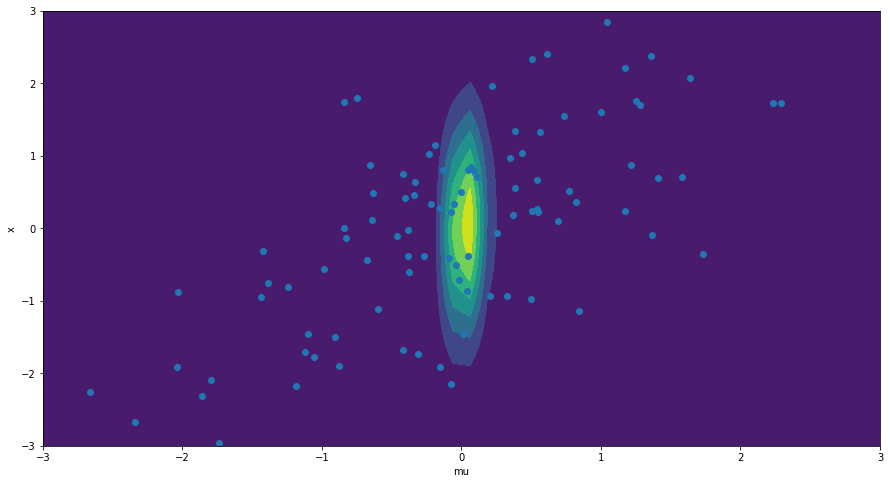

In [13]:
# Plot joint posterior distribution
plt.figure(figsize=(15,8))
cnt = contourf(mu_plot, x_plot, grid)
plt.xlabel('mu')
plt.ylabel('x')
plt.ylim((-3,3))
plt.xlim((-3,3))
_ = plt.scatter(mu, X)

Text(0.5, 1.0, 'Posterior marginal distribution of x (not normalized)')

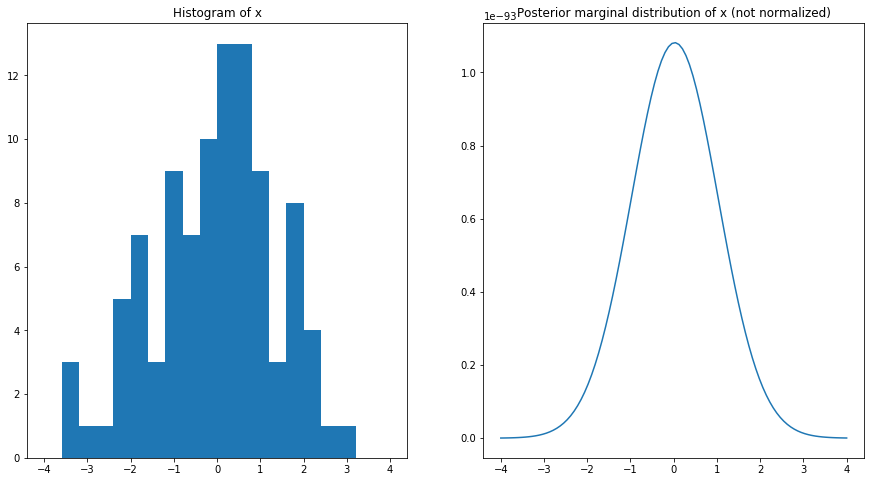

In [11]:
# Visualize posterior marginal distribution of x
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
hist(X,range=[range_marginal_x_lower,range_marginal_x_upper],bins=20)
plt.title('Histogram of x')

plt.subplot(1, 2, 2)
plt.plot(np.linspace(range_marginal_x_lower,range_marginal_x_upper,resolution_marginal_x), marginals_x)
plt.title('Posterior marginal distribution of x (not normalized)')

Text(0.5, 1.0, 'Posterior marginal distribution of mu (not normalized)')

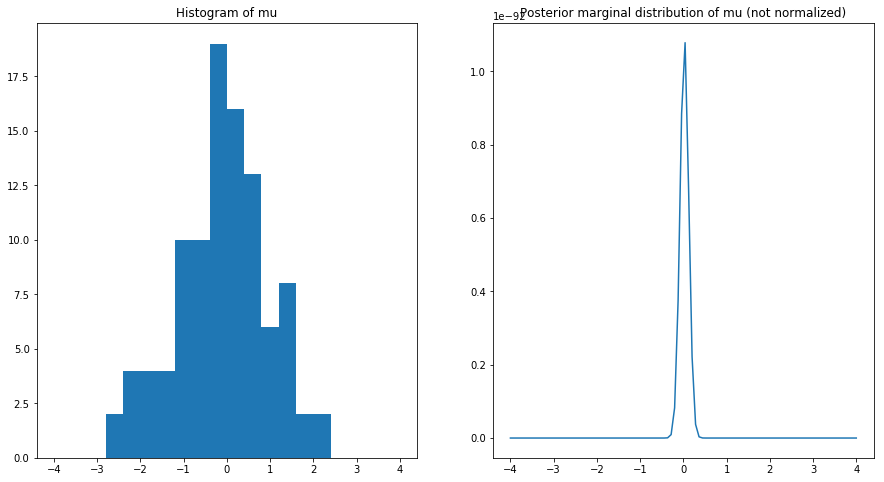

In [12]:
# Visualize posterior marginal distribution of mu
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
hist(mu,range=[range_marginal_mu_lower,range_marginal_mu_upper],bins=20)
plt.title('Histogram of mu')

plt.subplot(1, 2, 2)
plt.plot(np.linspace(range_marginal_mu_lower,range_marginal_mu_upper,resolution_marginal_mu), marginals_mu)
plt.title('Posterior marginal distribution of mu (not normalized)')